# EEG DATA ANALYSIS

Electroencephalography (EEG) is a method to record an electrogram of the electrical activity on the scalp that has been shown to represent the macroscopic activity of the surface layer of the brain underneath. It is typically non-invasive, with the electrodes placed along the scalp. Electrocorticography, involving invasive electrodes, is sometimes called intracranial EEG.

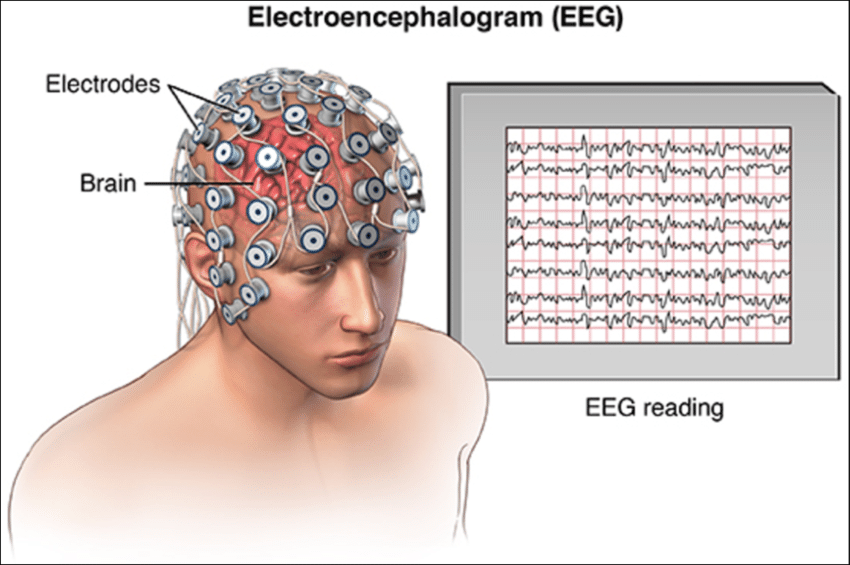

EEG measures voltage fluctuations resulting from ionic current within the neurons of the brain. Clinically, EEG refers to the recording of the brain's spontaneous electrical activity over a period of time, as recorded from multiple electrodes placed on the scalp.

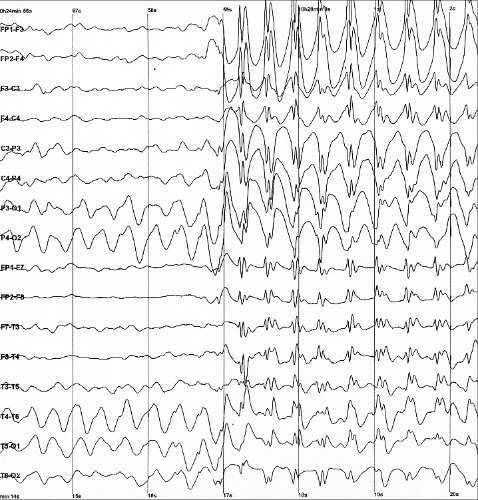

In [1]:
#importing header files
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data1.csv")
#Dropping an unnecessary column
F=F.drop('Unnamed: 0',axis=1)
#Checking the sample data
print(F.head(5))
print(F.dtypes)

   trial number sensor position  sample num  sensor value subject identifier  \
0             0             FP1           0        -8.921                  a   
1             0             FP1           1        -8.433                  a   
2             0             FP1           2        -2.574                  a   
3             0             FP1           3         5.239                  a   
4             0             FP1           4        11.587                  a   

  matching condition  channel         name      time  
0             S1 obj        0  co2a0000364  0.000000  
1             S1 obj        0  co2a0000364  0.003906  
2             S1 obj        0  co2a0000364  0.007812  
3             S1 obj        0  co2a0000364  0.011719  
4             S1 obj        0  co2a0000364  0.015625  
trial number            int64
sensor position        object
sample num              int64
sensor value          float64
subject identifier     object
matching condition     object
channel  

In [3]:
sensor_positions = F[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['sensor position']
channels = F[['sensor position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['channel'] 
print(sensor_positions)
print(channels)

0     FP1
1     FP2
2      F7
3      F8
4     AF1
     ... 
59     P2
60     P1
61    CPZ
62     nd
63      Y
Name: sensor position, Length: 64, dtype: object
0      0
1      1
2      2
3      3
4      4
      ..
59    59
60    60
61    61
62    62
63    63
Name: channel, Length: 64, dtype: int64


channel		sensor

 0 ---------------> FP1	-->(x, y)  (362, 194)
 1 ---------------> FP2	-->(x, y)  (568, 193)
 2 ---------------> F7	-->(x, y)  (188, 310)
 3 ---------------> F8	-->(x, y)  (742, 310)
 4 ---------------> AF1	-->(x, y)  (414, 264)
 5 ---------------> AF2	-->(x, y)  (519, 264)
 6 ---------------> FZ	-->(x, y)  (465, 347)
 7 ---------------> F4	-->(x, y)  (609, 340)
 8 ---------------> F3	-->(x, y)  (321, 340)
 9 ---------------> FC6	-->(x, y)  (713, 419)
10 ---------------> FC5	-->(x, y)  (217, 419)
11 ---------------> FC2	-->(x, y)  (549, 429)
12 ---------------> FC1	-->(x, y)  (381, 429)
13 ---------------> T8	-->(x, y)  (812, 512)
14 ---------------> T7	-->(x, y)  (118, 512)
15 ---------------> CZ	-->(x, y)  (465, 512)
16 ---------------> C3	-->(x, y)  (292, 512)
17 ---------------> C4	-->(x, y)  (638, 512)
18 ---------------> CP5	-->(x, y)  (217, 605)
19 ---------------> CP6	-->(x, y)  (713, 606)
20 ---------------> CP1	-->(x, y)  (382, 595)
21 ---------------> CP2	-->


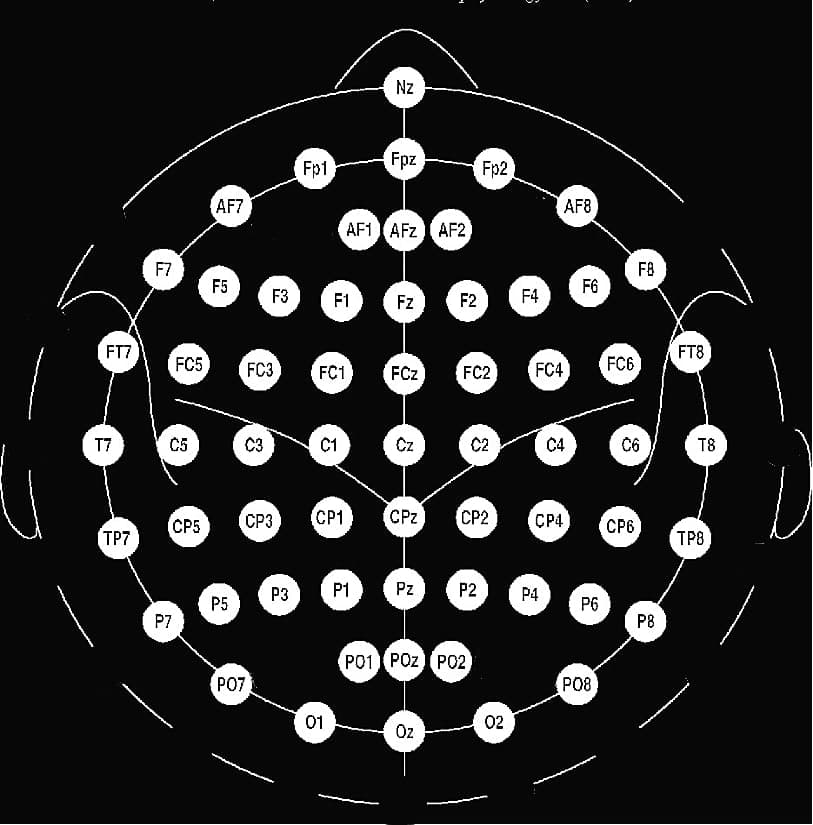

In [4]:
import colorama
import base64
from colorama import Fore

with open("C:\EEG_SEM5\elec-pos.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
encoded_image = "data:image/png;base64," + encoded_string

Y=[194, 193, 310, 310, 264, 264, 347, 340, 340, 419, 419, 429, 429, 512, 512, 512, 512, 512, 605, 606, 595, 595, 684, 684, 677, 715, 715, 761, 761, 831, 831, -30, 237, 237, 330, 330, 405, 405, 183, 425, 426, 512, 512, 346, 346, 619, 619, 265, 599, 599, 695, 695, 512, 512, 787, 787, 430, 760, 842, 679, 679, 594, 100, -60]
X=[362, 568, 188, 742, 414, 519, 465, 609, 321, 713, 217, 549, 381, 812, 118, 465, 292, 638, 217, 713, 382, 549, 321, 609, 465, 742, 188, 519, 414, 568, 362, -30, 266, 664, 252, 678, 136, 794, 465, 631, 299, 725, 205, 537, 393, 794, 136, 465, 299, 631, 252, 678, 379, 552, 266, 664, 465, 465, 465, 538, 393, 465, 465, -60]
col=[]
sz=[]

ch_sen = pd.DataFrame({'sensor':sensor_positions, 'channel':channels})
ch = 0
print('channel\t\tsensor\n')
for i in ch_sen['sensor']:
    tmp=''
    if(ch < 10):
        tmp = ' '
    print(Fore.BLUE + tmp + str(ch) + Fore.BLACK + ' ---------------> ' + Fore.RED + str(i) + Fore.BLACK + '\t-->(x, y)  (' + Fore.GREEN + str(X[ch]) + ', ' + str(Y[ch]) + Fore.BLACK + ')')
    ch+=1

for i in range(0, 64):
    col.append(1)
    sz.append(35)
   
fig = go.Figure(data=[go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    marker=dict(
        color=col,
        size=sz,
        opacity=0.6,
        showscale=True
        )
)])

img_width = 934
img_height = 948
scale_factor = 0.1
fig.add_layout_image(
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1,
        layer="below",
        source=encoded_image
)
fig.update_xaxes(showgrid=False, range=(0, img_width))
fig.update_yaxes(showgrid=False, scaleanchor='x', range=(img_height, 0))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

End of Loop


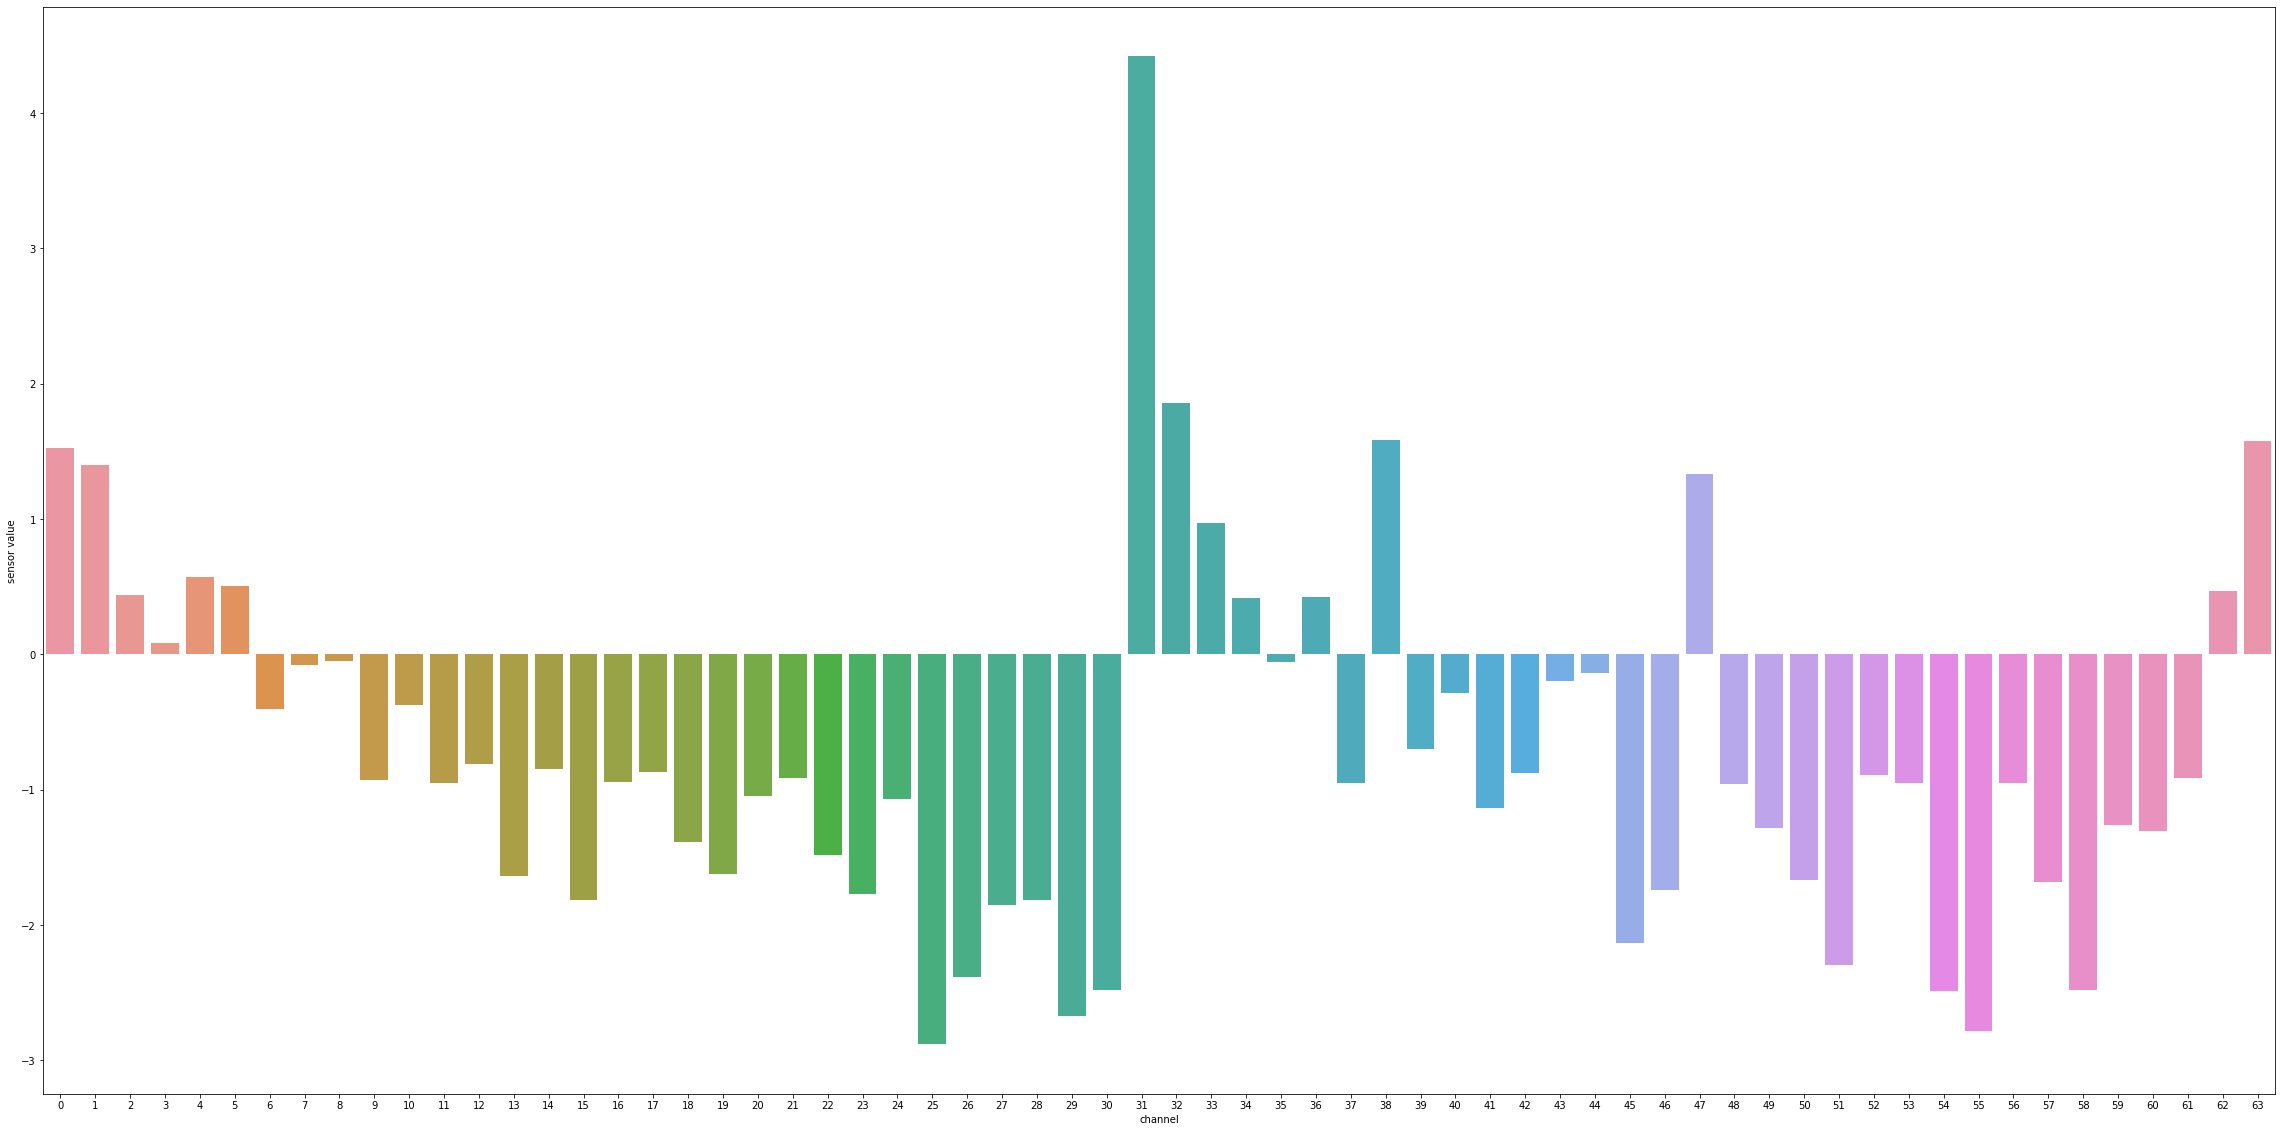

In [5]:
n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'matching condition']=='S1 obj' and F.loc[5,'subject identifier']=='a':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop")

X1=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)

s,ax=plt.subplots(figsize=(40,20))
sns.barplot(x='channel',y='sensor value',data=X1)

Xa1=X1[['sensor value']]
x1=[]
for column in Xa1.columns:
    x1=Xa1[column].tolist()
x1.reverse()

End of Loop


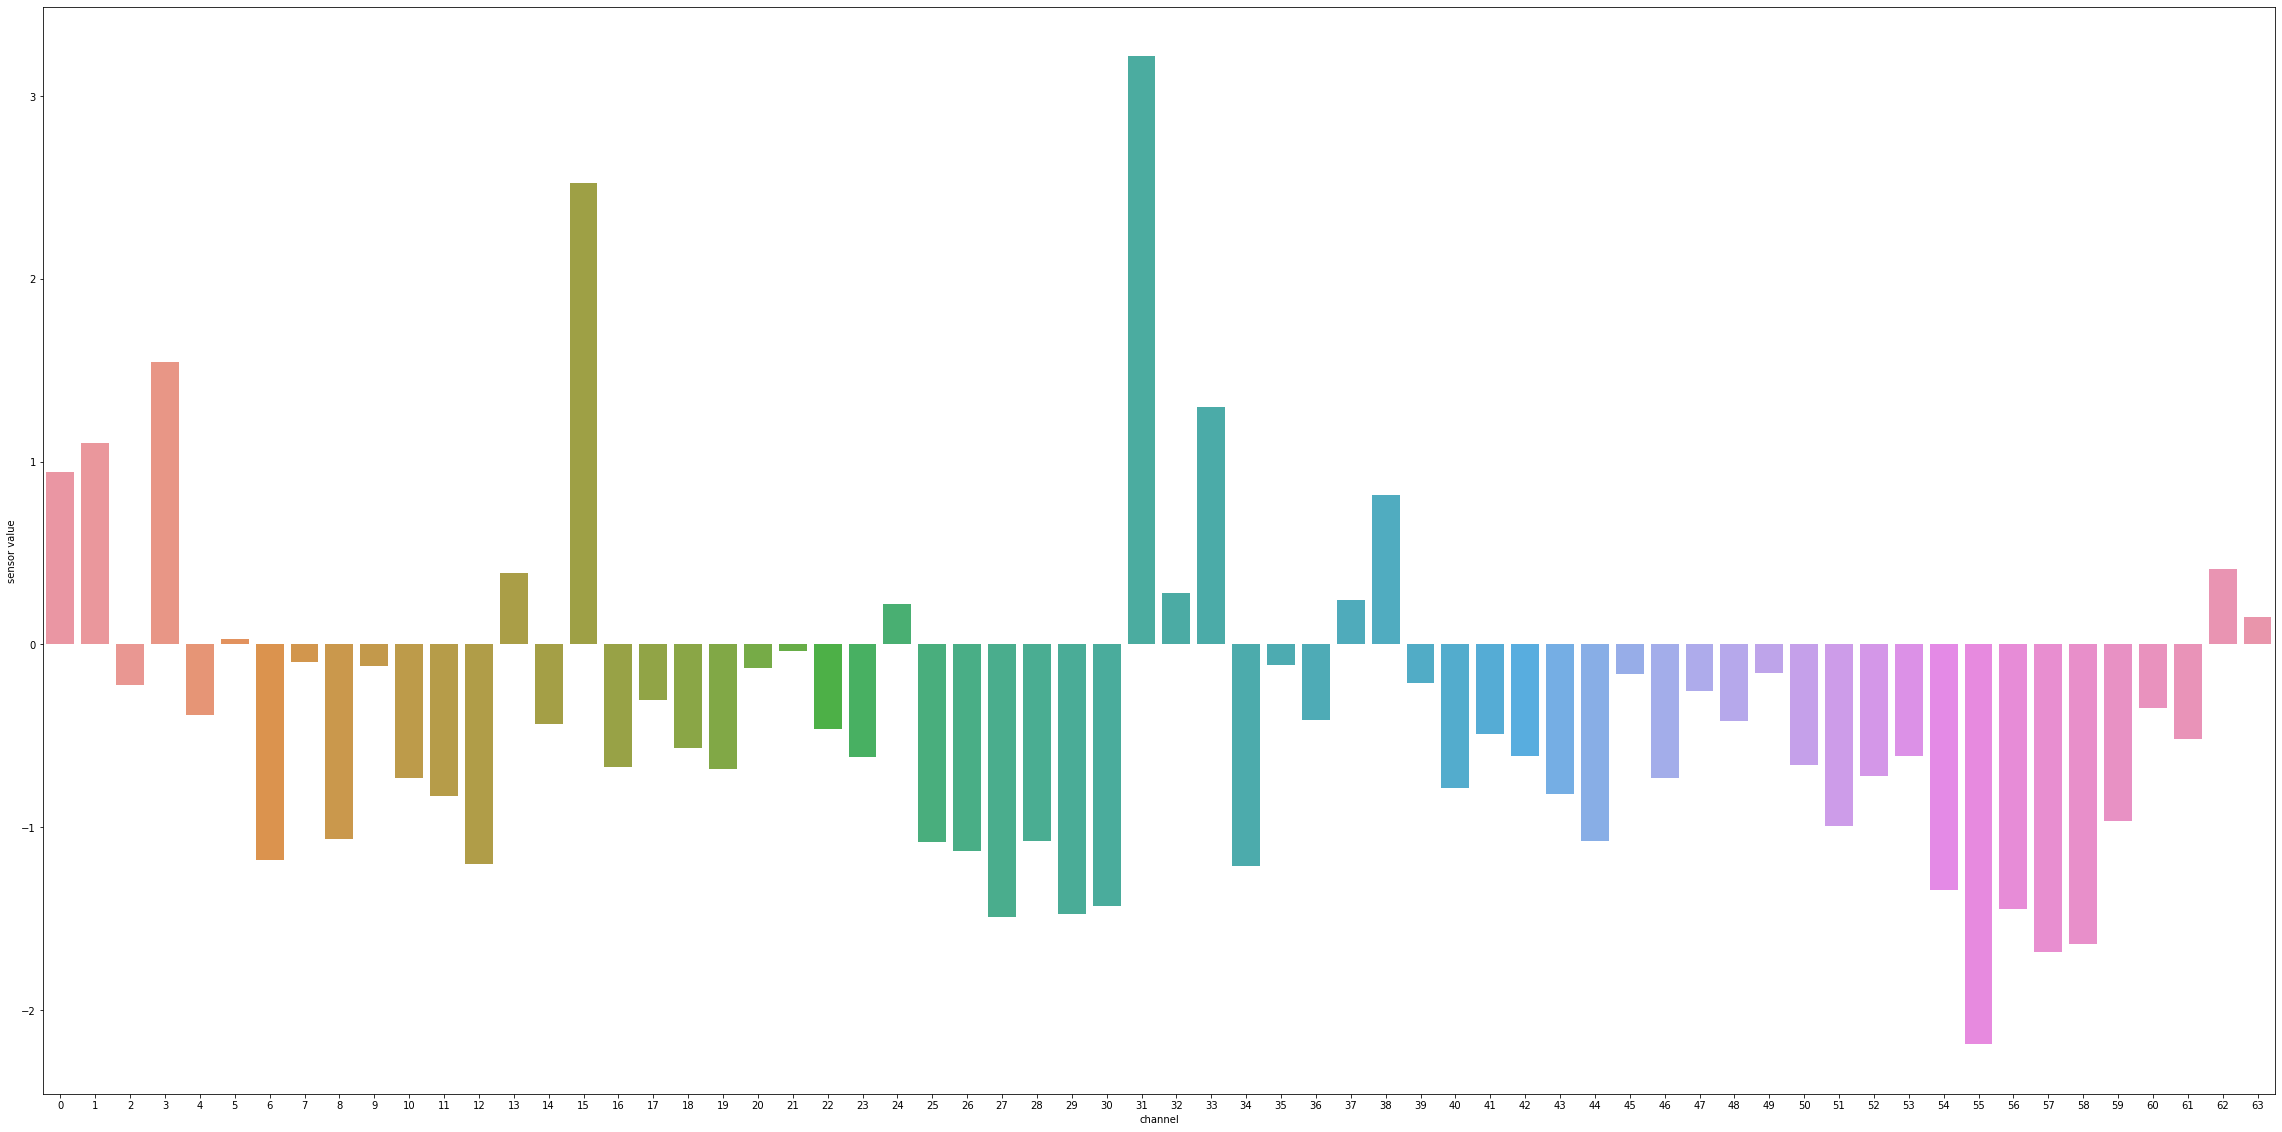

In [6]:
n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'matching condition']=='S1 obj' and F.loc[5,'subject identifier']=='c':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop")

X2=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)
s,ax=plt.subplots(figsize=(40,20))
sns.barplot(x='channel',y='sensor value',data=X2)

Xa1=X2[['sensor value']]
x2=[]
for column in Xa1.columns:
    x2=Xa1[column].tolist()
x2.reverse()

In [7]:
B=[]
for i in range(0, 64):
    B.append(str(i))

fig = go.Figure()
fig.add_trace(go.Bar(x=B, y=x1, name="Alcohol Group"))
fig.add_trace(go.Bar(x=B, y=x2, name="Control Group"))

fig.update_layout(barmode='group',
                    title="Only One figure Shown",
                    xaxis_title="Sensor Channel",
                    yaxis_title="Sensor Value",
                    legend_title="Plotted :",)
fig.show()


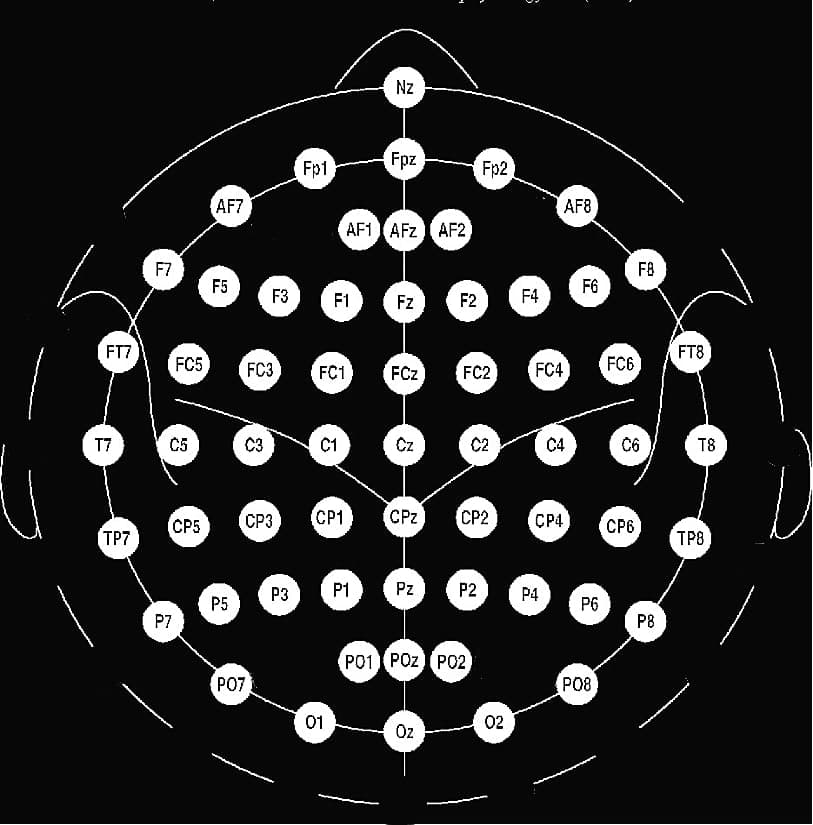

In [8]:
import plotly.graph_objects as go
import base64

with open("C:\EEG_SEM5\elec-pos.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
encoded_image = "data:image/png;base64," + encoded_string

Y=[194, 193, 310, 310, 264, 264, 347, 340, 340, 419, 419, 429, 429, 512, 512, 512, 512, 512, 605, 606, 595, 595, 684, 684, 677, 715, 715, 761, 761, 831, 831, -30, 237, 237, 330, 330, 405, 405, 183, 425, 426, 512, 512, 346, 346, 619, 619, 265, 599, 599, 695, 695, 512, 512, 787, 787, 430, 760, 842, 679, 679, 594, 100, -60]
X=[362, 568, 188, 742, 414, 519, 465, 609, 321, 713, 217, 549, 381, 812, 118, 465, 292, 638, 217, 713, 382, 549, 321, 609, 465, 742, 188, 519, 414, 568, 362, -30, 266, 664, 252, 678, 136, 794, 465, 631, 299, 725, 205, 537, 393, 794, 136, 465, 299, 631, 252, 678, 379, 552, 266, 664, 465, 465, 465, 538, 393, 465, 465, -60]
col = []
sz = []
for i in range(0, 64):
    col.append(abs(x1[i]-x2[i]))
    sz.append(35)
   
fig = go.Figure(data=[go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    marker=dict(
        color=col,
        size=sz,
        opacity=0.6,
        showscale=True
        )
)])

img_width = 934
img_height = 948
scale_factor = 0.1
fig.add_layout_image(
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1,
        layer="below",
        source=encoded_image
)
fig.update_xaxes(showgrid=False, range=(0, img_width))
fig.update_yaxes(showgrid=False, scaleanchor='x', range=(img_height, 0))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

End of Loop


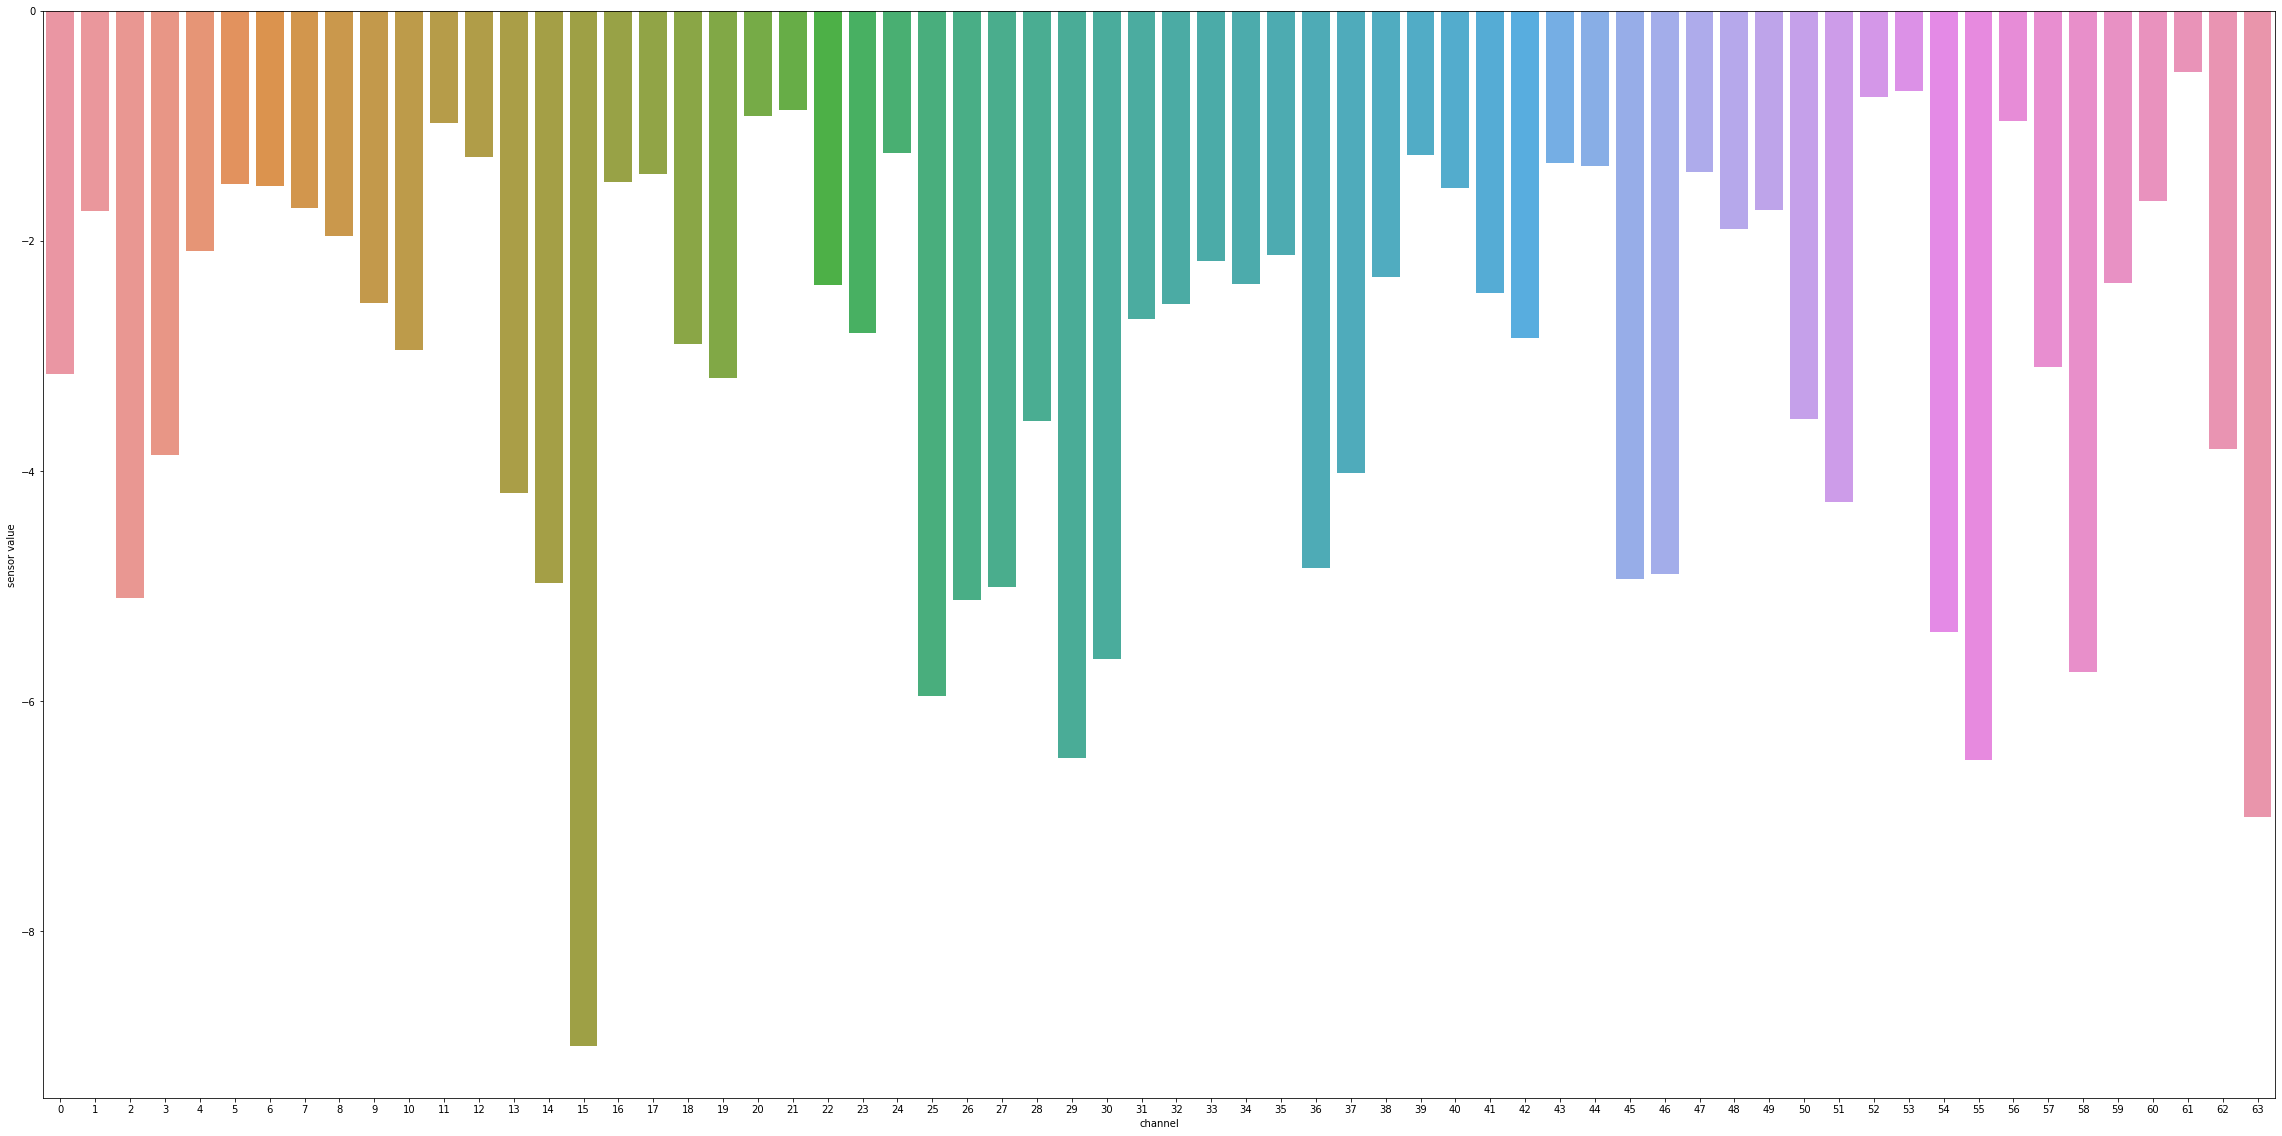

In [9]:
n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'matching condition']=='S2 match' and F.loc[5,'subject identifier']=='a':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop")

X3=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)
s,ax=plt.subplots(figsize=(40,20))
sns.barplot(x='channel',y='sensor value',data=X3)

Xa1=X3[['sensor value']]
x3=[]
for column in Xa1.columns:
    x3=Xa1[column].tolist()
x3.reverse()

End of Loop


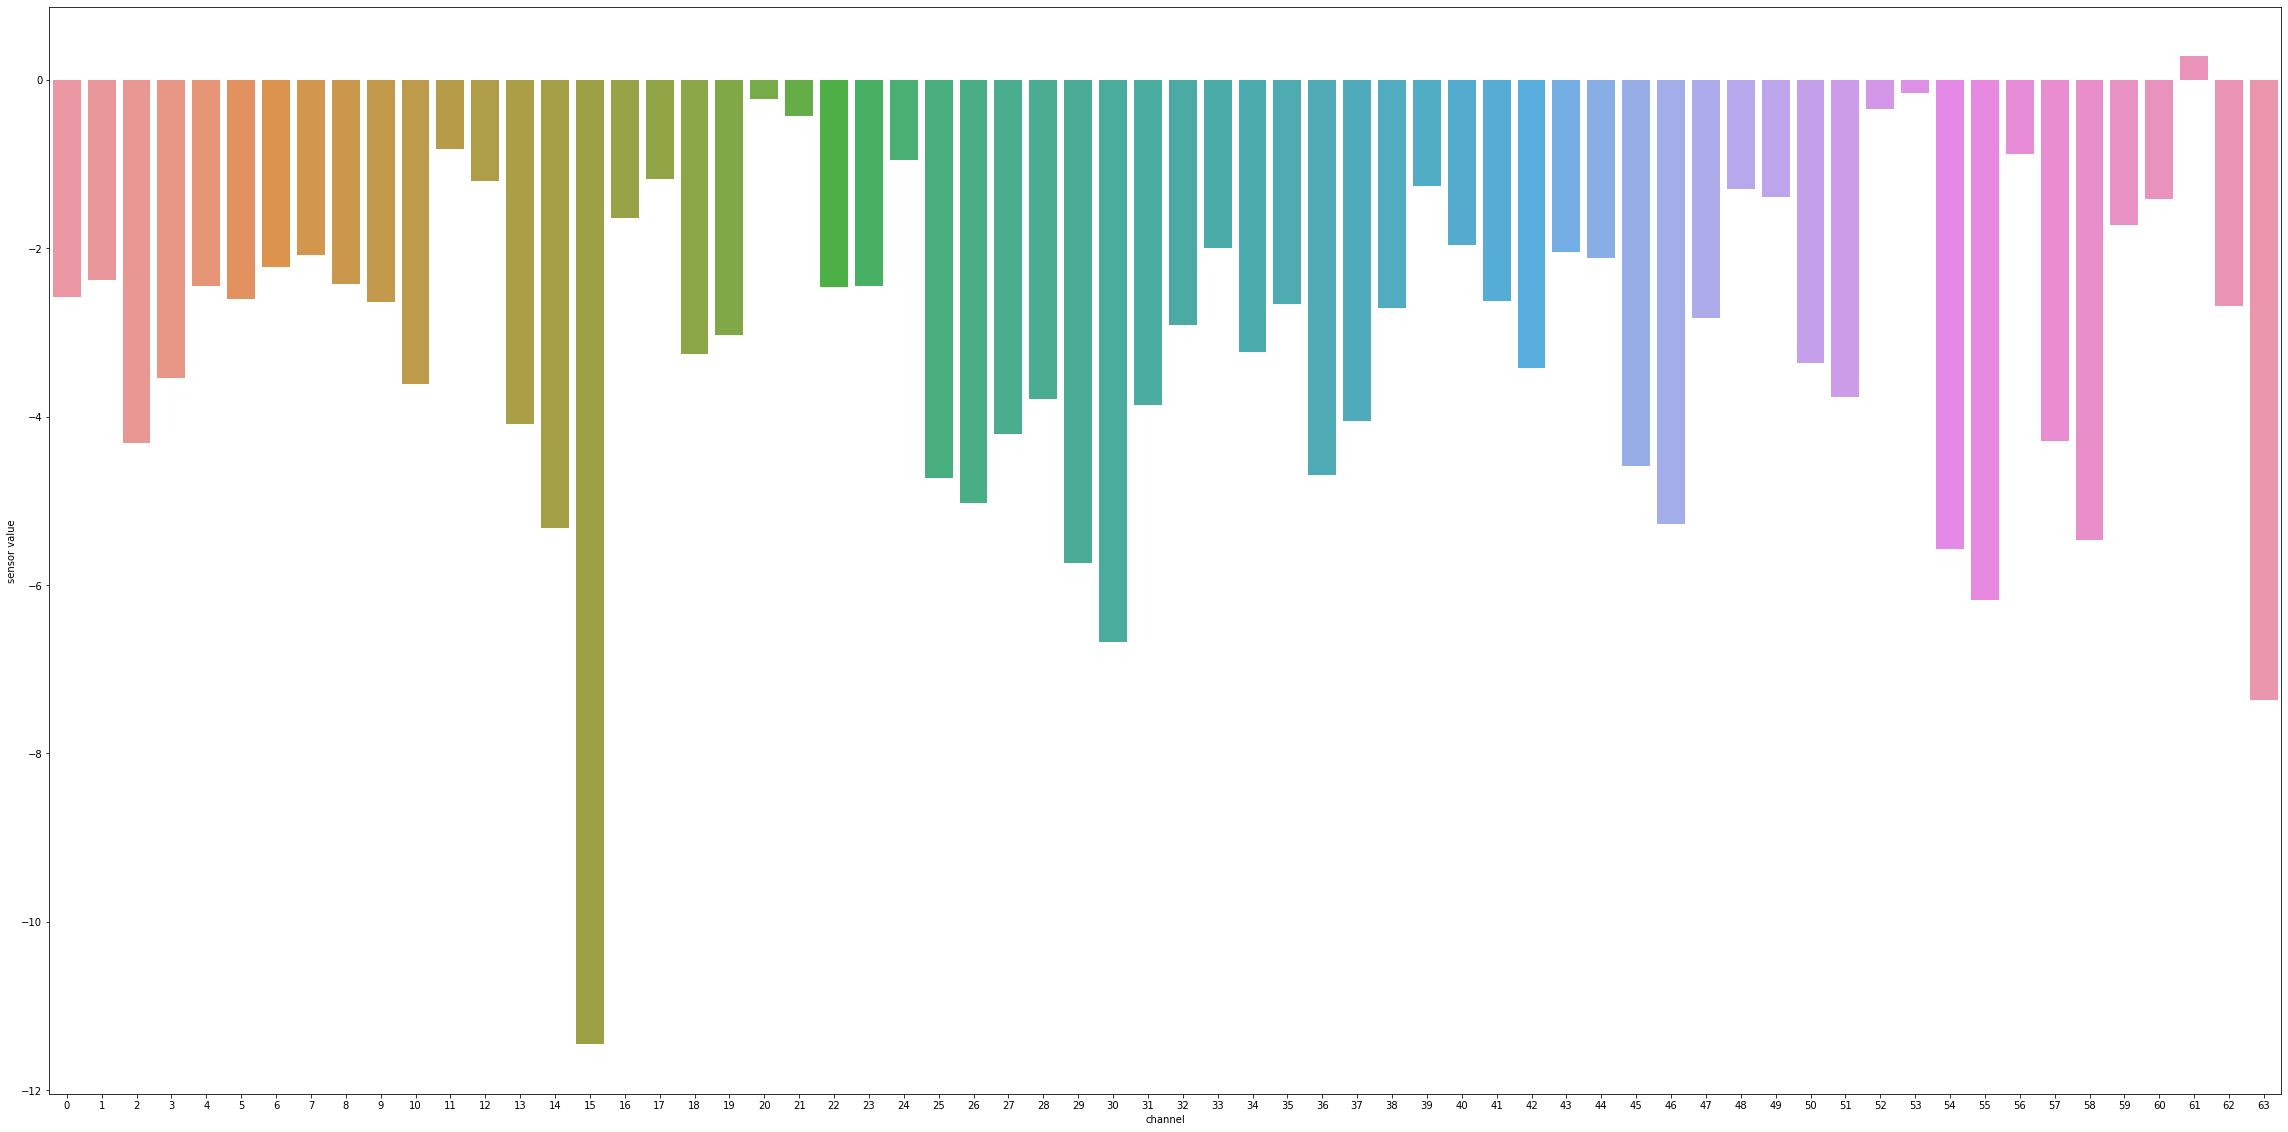

In [10]:
n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'matching condition']=='S2 match' and F.loc[5,'subject identifier']=='c':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop")

X4=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)
s,ax=plt.subplots(figsize=(40,20))
sns.barplot(x='channel',y='sensor value',data=X4)

Xa1=X4[['sensor value']]
x4=[]
for column in Xa1.columns:
    x4=Xa1[column].tolist()
x4.reverse()

In [11]:
B=[]
for i in range(0, 64):
    B.append(str(i))

fig = go.Figure()
fig.add_trace(go.Bar(x=B, y=x3, name="Alcohol Group"))
fig.add_trace(go.Bar(x=B, y=x4, name="Control Group"))


fig.update_layout(barmode='group',
                    title="Identical Images Shown",
                    xaxis_title="Sensor Channel",
                    yaxis_title="Sensor Value",
                    legend_title="Plotted :",)
fig.show()


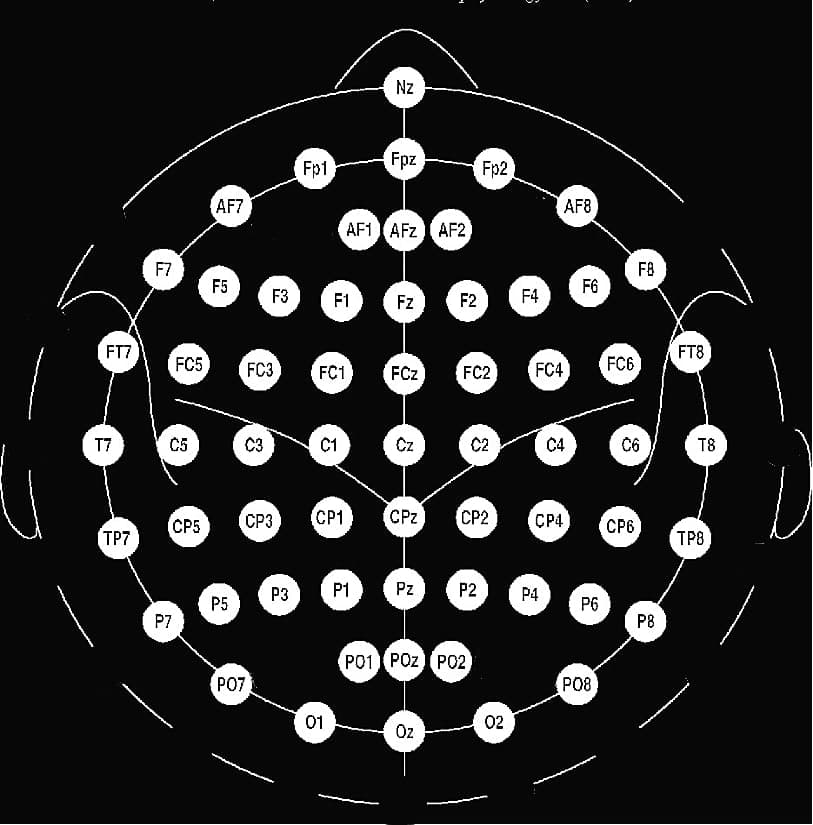

In [12]:
with open("C:\EEG_SEM5\elec-pos.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
encoded_image = "data:image/png;base64," + encoded_string

Y=[194, 193, 310, 310, 264, 264, 347, 340, 340, 419, 419, 429, 429, 512, 512, 512, 512, 512, 605, 606, 595, 595, 684, 684, 677, 715, 715, 761, 761, 831, 831, -30, 237, 237, 330, 330, 405, 405, 183, 425, 426, 512, 512, 346, 346, 619, 619, 265, 599, 599, 695, 695, 512, 512, 787, 787, 430, 760, 842, 679, 679, 594, 100, -60]
X=[362, 568, 188, 742, 414, 519, 465, 609, 321, 713, 217, 549, 381, 812, 118, 465, 292, 638, 217, 713, 382, 549, 321, 609, 465, 742, 188, 519, 414, 568, 362, -30, 266, 664, 252, 678, 136, 794, 465, 631, 299, 725, 205, 537, 393, 794, 136, 465, 299, 631, 252, 678, 379, 552, 266, 664, 465, 465, 465, 538, 393, 465, 465, -60]
col = []
sz = []
for i in range(0, 64):
    col.append(abs(x3[i]-x4[i]))
    sz.append(35)
   
fig = go.Figure(data=[go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    marker=dict(
        color=col,
        size=sz,
        opacity=0.6,
        showscale=True
        )
)])

img_width = 934
img_height = 948
scale_factor = 0.1
fig.add_layout_image(
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1,
        layer="below",
        source=encoded_image
)
fig.update_xaxes(showgrid=False, range=(0, img_width))
fig.update_yaxes(showgrid=False, scaleanchor='x', range=(img_height, 0))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

End of Loop


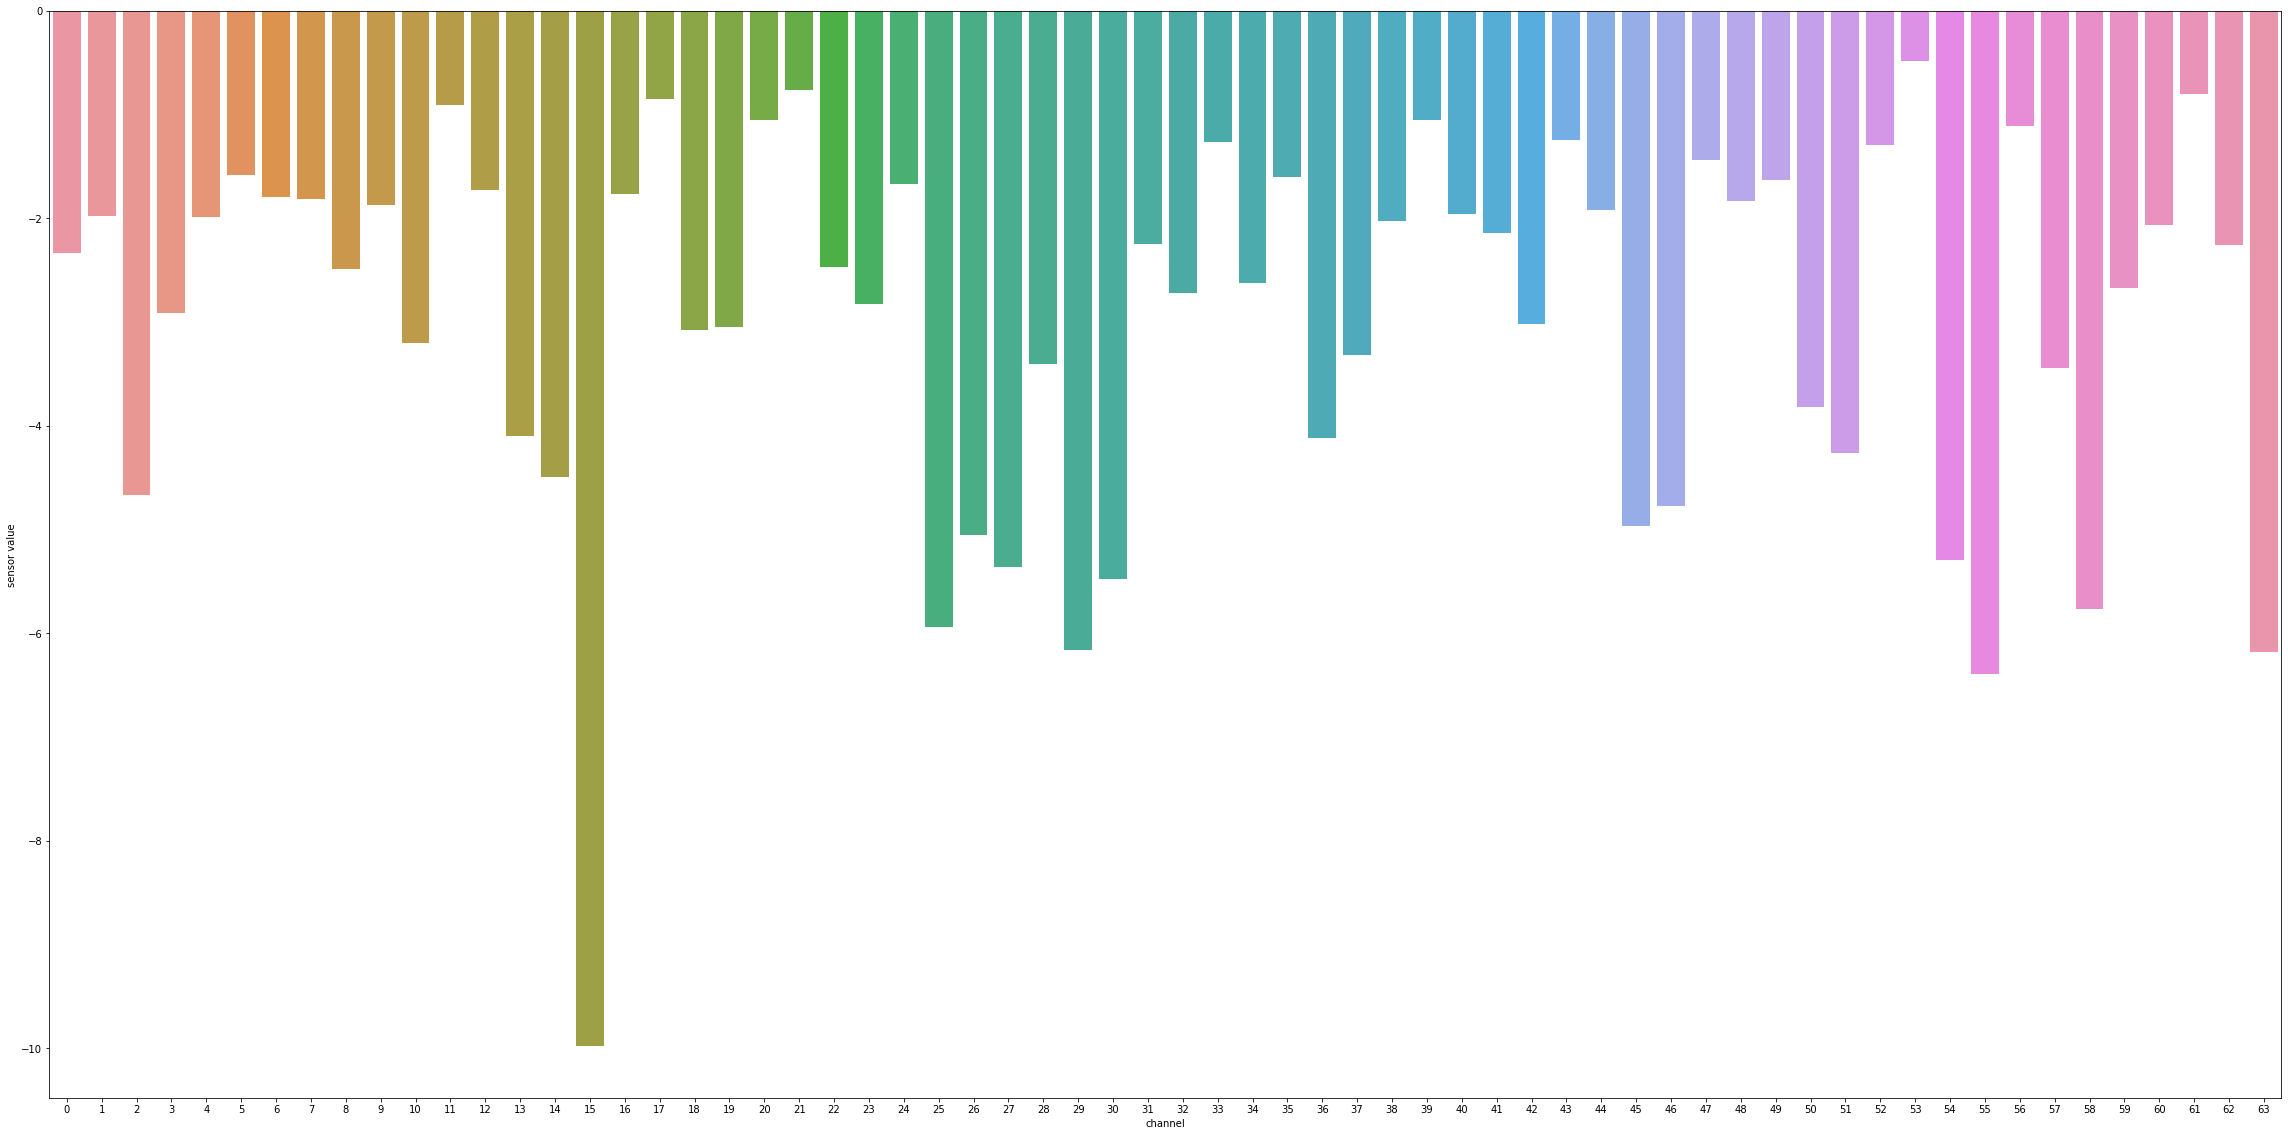

In [13]:
n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'matching condition']=='S2 nomatch,' and F.loc[5,'subject identifier']=='a':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop")

X5=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)
s,ax=plt.subplots(figsize=(40,20))
sns.barplot(x='channel',y='sensor value',data=X5)

Xa1=X5[['sensor value']]
x5=[]
for column in Xa1.columns:
    x5=Xa1[column].tolist()
x5.reverse()

End of Loop


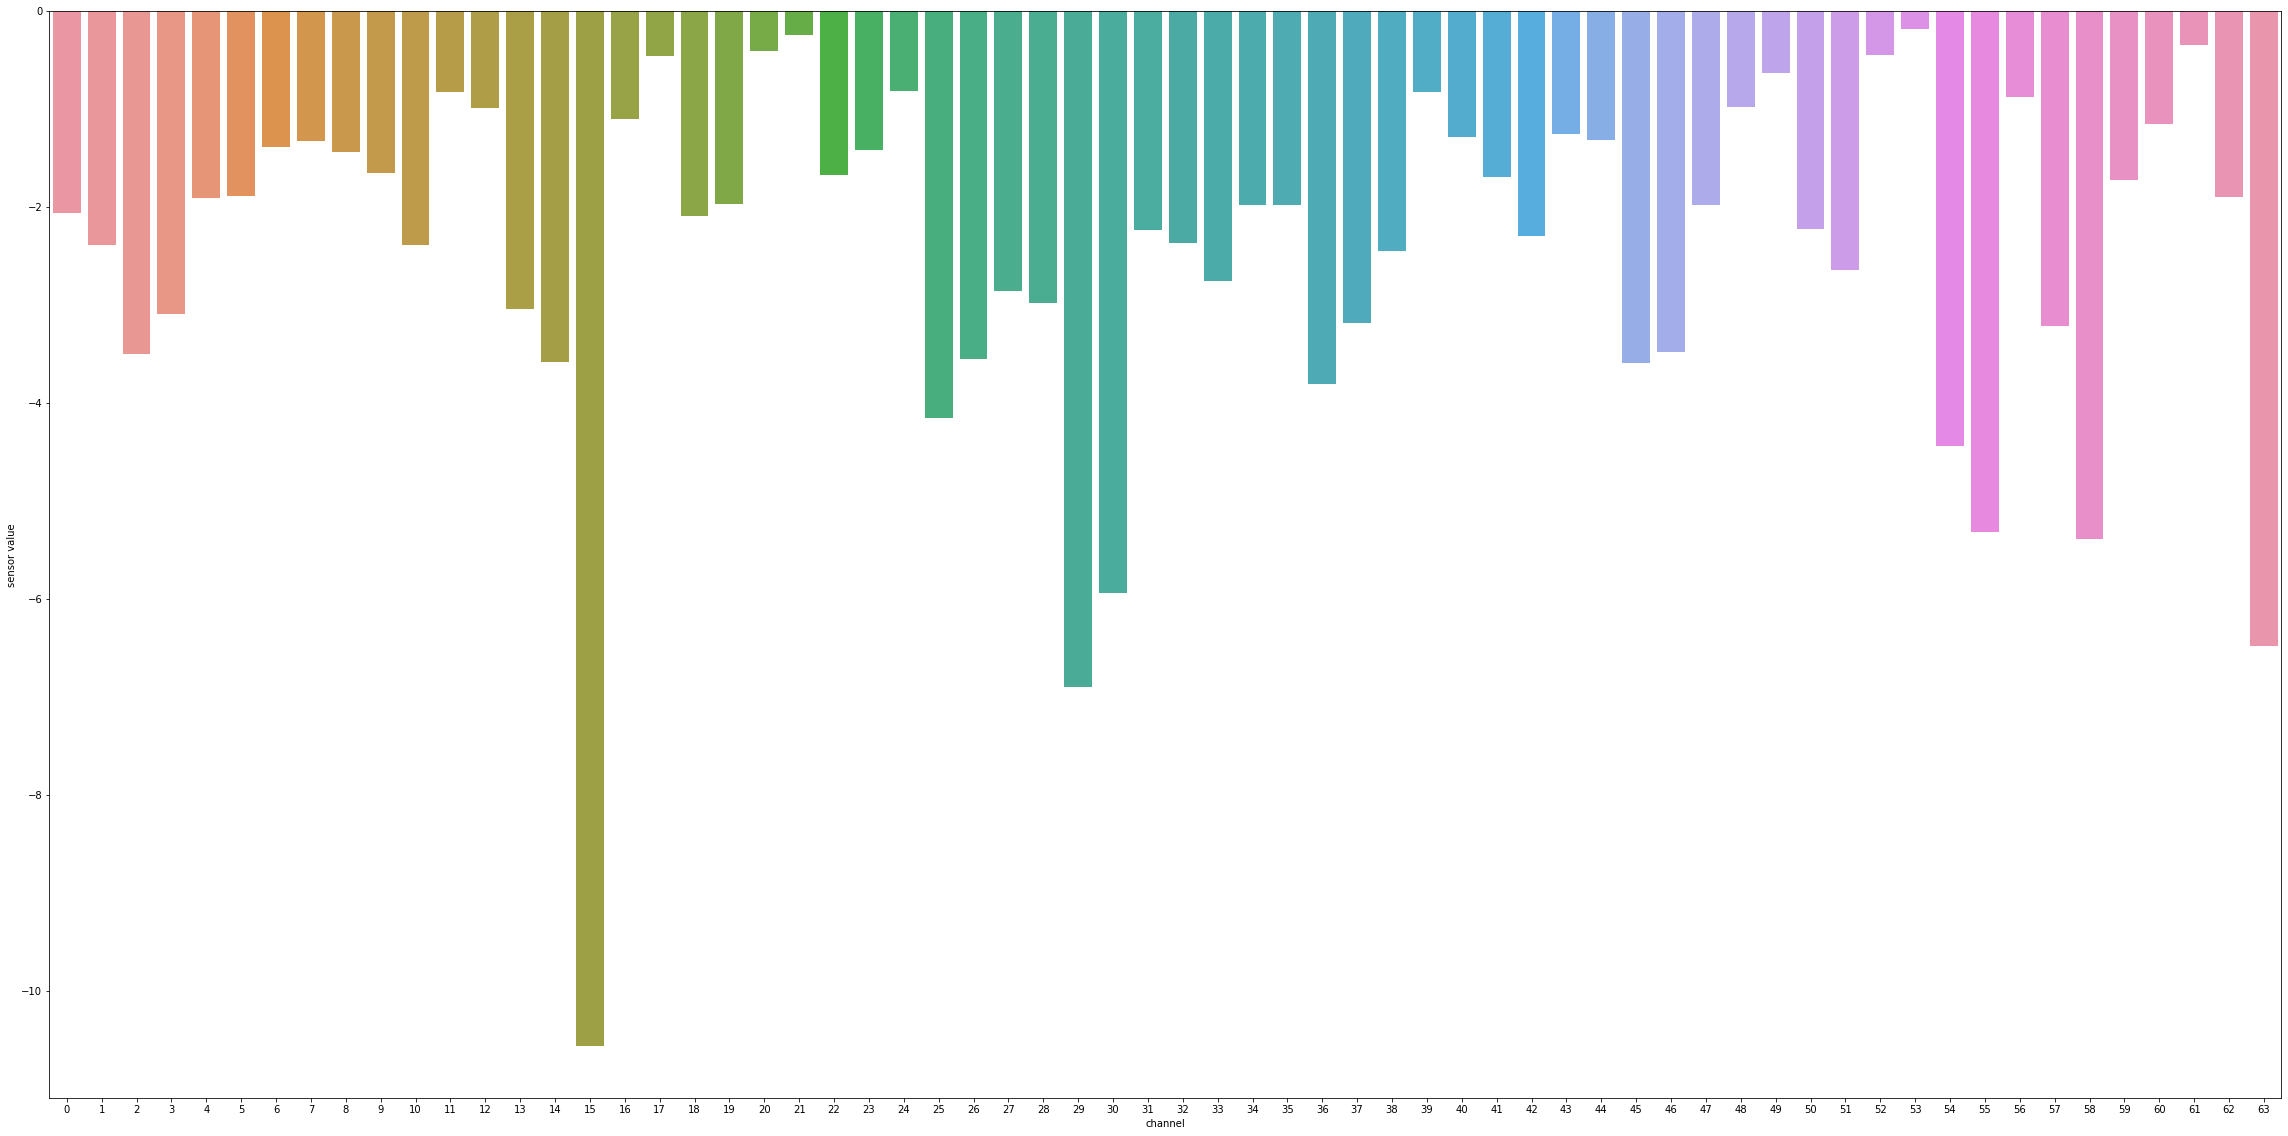

In [14]:
n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'matching condition']=='S2 nomatch,' and F.loc[5,'subject identifier']=='c':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop")

X6=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)
s,ax=plt.subplots(figsize=(40,20))
sns.barplot(x='channel',y='sensor value',data=X6)

Xa1=X6[['sensor value']]
x6=[]
for column in Xa1.columns:
    x6=Xa1[column].tolist()
x6.reverse()

In [15]:
B=[]
for i in range(0, 64):
    B.append(str(i))

fig = go.Figure()
fig.add_trace(go.Bar(x=B, y=x5, name="Alcohol Group"))
fig.add_trace(go.Bar(x=B, y=x6, name="Control Group"))

fig.update_layout(barmode='group',
                    title="Non Idendtical Images Shown",
                    xaxis_title="Sensor Channel",
                    yaxis_title="Sensor Value",
                    legend_title="Plotted :",)

fig.show()


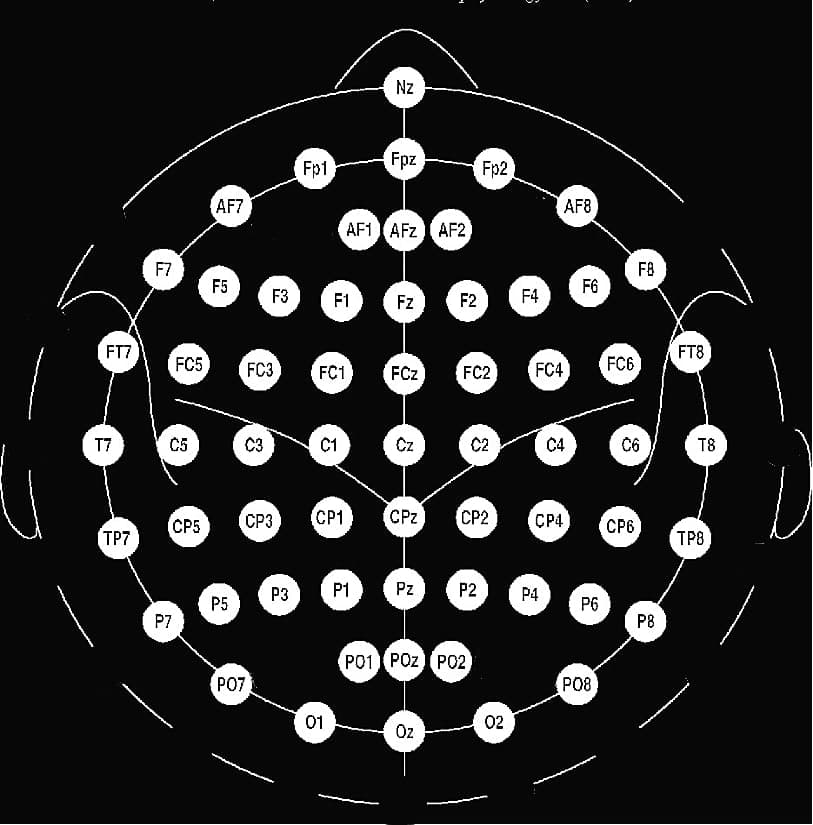

In [16]:
with open("C:\EEG_SEM5\elec-pos.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
encoded_image = "data:image/png;base64," + encoded_string

Y=[194, 193, 310, 310, 264, 264, 347, 340, 340, 419, 419, 429, 429, 512, 512, 512, 512, 512, 605, 606, 595, 595, 684, 684, 677, 715, 715, 761, 761, 831, 831, -30, 237, 237, 330, 330, 405, 405, 183, 425, 426, 512, 512, 346, 346, 619, 619, 265, 599, 599, 695, 695, 512, 512, 787, 787, 430, 760, 842, 679, 679, 594, 100, -60]
X=[362, 568, 188, 742, 414, 519, 465, 609, 321, 713, 217, 549, 381, 812, 118, 465, 292, 638, 217, 713, 382, 549, 321, 609, 465, 742, 188, 519, 414, 568, 362, -30, 266, 664, 252, 678, 136, 794, 465, 631, 299, 725, 205, 537, 393, 794, 136, 465, 299, 631, 252, 678, 379, 552, 266, 664, 465, 465, 465, 538, 393, 465, 465, -60]
col = []
sz = []
for i in range(0, 64):
    col.append(abs(x5[i]-x6[i]))
    sz.append(35)
   
fig = go.Figure(data=[go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    marker=dict(
        color=col,
        size=sz,
        opacity=0.6,
        showscale=True
        )
)])

img_width = 934
img_height = 948
scale_factor = 0.1
fig.add_layout_image(
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1,
        layer="below",
        source=encoded_image
)
fig.update_xaxes(showgrid=False, range=(0, img_width))
fig.update_yaxes(showgrid=False, scaleanchor='x', range=(img_height, 0))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

In [17]:
S1=pd.DataFrame({'Channel':X1['channel'], 'Alcohol':X1['sensor value'],'Control':X2['sensor value']})
S2Match=pd.DataFrame({'Channel':X3['channel'], 'Alcohol':X3['sensor value'],'Control':X4['sensor value']})
S2NoMatch=pd.DataFrame({'Channel':X5['channel'], 'Alcohol':X5['sensor value'],'Control':X6['sensor value']})

In [18]:
def brain_test(df, col1, col2, alpha):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    n, _, diff, var, _, _ = stats.describe(df[col1] - df[col2])
    degfree = n - 1

    temp1 = df[col1].to_numpy()
    temp2 = df[col2].to_numpy()
    res = ss.ttest_rel(temp1, temp2)
      
    means = ws.CompareMeans(ws.DescrStatsW(temp1), ws.DescrStatsW(temp2))
    confint = means.tconfint_diff(alpha=alpha, alternative='two-sided', usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index) 

def conc(mean1, mean2, stat, p_val, low95ci, high95ci, crit = 1.96, conf_lvl = 0.05, conf_int = 95):
    import colorama
    from colorama import Fore
    import textwrap
    flag1 = False
    flag2 = False
    print(Fore.RED + "\t\tRESULT : \n\n" +Fore.BLACK)
    result = ""
    result = "The difference of the means is "
    result += str(round(abs(mean1-mean2), 3))
    result += " inches. You can see this difference graphically by "
    result += "comparing the positions of the solid red lines showning the means of the two "
    result += "distirbutions."
    print(textwrap.fill(result, 100))
    
    print("\n\n")
    result = "The critical value of the two-sided t-statistic is "
    result += str(crit)
    result += ". The t-statistic of "
    result += str(round(stat, 3))
    result += " is "
    if(stat > crit):
        result += "greater "
        flag1 = True
    else:
        result += "smaller "
        flag1 = False
    result += "than this critical value."
    print(textwrap.fill(result, 100))
    
    print("\n\n")
    result = "The P-value is effectively "
    result += str(round(p_val, 3))
    result += ", which is "
    if(p_val > conf_lvl):
        result += "larger "
        flag2 = False
    else:
        result += "smaller "
        flag2 = True
    result += "than the significance level of "
    result += str(conf_lvl)
    result += "."
    print(textwrap.fill(result, 100))
    
    print("\n\n")
    result = "The "
    result += str(conf_int)
    result += "% confidence interval of the difference in means is from "
    result += str(round(low95ci, 3))
    result += " to "
    result += str(round(high95ci, 3))
    result += ", which does "
    if(high95ci*low95ci > 0):
        result += "not "
    result += "overlap 0. You can see the confidence interval plotted as the two dashed "
    result += "red lines in the lower chart shown below. This confidence interval around the mean of "
    result += "the alcohol's sensor value does "
    if(not(mean1 <= mean2+high95ci and mean1 >= mean2+low95ci)):
        result += "not "
    result += "overlap with the mean of the control's sensor value ."
    print(textwrap.fill(result, 100))
    
    print("\n\n")
    result = "Overall, these statistics indicate you can"
    if(not(flag1 and flag2)):
        result += "not"
    result += " reject the null hypothesis, or that their "
    result += "difference in the means is " + Fore.RED
    if(flag1 and flag2):
        result += "not "
    result += "0, \033[1mAnd so the data of above category is "
    if(flag1 and flag2):
        result += "not "
    result += "similar\033[0m"
    print(textwrap.fill(result, 100), "\n\n\n")
    
def hist_brain_conf(df, col1, col2, num_bins = 30, alpha =0.05):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    mins = min([df[col1].min(), df[col2].min()])
    maxs = max([df[col1].max(), df[col2].max()])
    
    mean1 = df[col1].mean()
    mean2 = df[col2].mean()
    
    tStat = brain_test(df, col1, col2, alpha)
    pv1 = mean2 + tStat[4]    
    pv2 = mean2 + tStat[5]
    
    ## Plot the histogram   
    temp = df[col1].to_numpy()
    ax[1].hist(temp, bins = 30, alpha = 1, rwidth = 0.9, color = 'orange')
    ax[1].set_xlim([mins, maxs])
    ax[1].axvline(x=mean1, color = 'red', linewidth = 2)    
    ax[1].axvline(x=pv1, color = 'red', linestyle='--', linewidth = 2)
    ax[1].axvline(x=pv2, color = 'red', linestyle='--', linewidth = 2)
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(col1)
    
    ## Plot the histogram   
    temp = df[col2].to_numpy()
    ax[0].hist(temp, bins = 30, alpha = 1, rwidth = 0.9, color = 'orange')
    ax[0].set_xlim([mins, maxs])
    ax[0].axvline(x=mean2, color = 'red', linewidth = 2)
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(col2)
    
    conc(mean1, mean2, tStat[2], tStat[3], tStat[4], tStat[5])
    
    return tStat

		RESULT : 


The difference of the means is 0.325 inches. You can see this difference graphically by comparing
the positions of the solid red lines showning the means of the two distirbutions.



The critical value of the two-sided t-statistic is 1.96. The t-statistic of 2.503 is greater than
this critical value.



The P-value is effectively 0.015, which is smaller than the significance level of 0.05.



The 95% confidence interval of the difference in means is from -0.08 to 0.73, which does overlap 0.
You can see the confidence interval plotted as the two dashed red lines in the lower chart shown
below. This confidence interval around the mean of the alcohol's sensor value does overlap with the
mean of the control's sensor value .



Overall, these statistics indicate you can reject the null hypothesis, or that their difference in
the means is not 0, And so the data of above category is not similar 





DegFreedom    112.747279
Difference      0.325109
Statistic       2.502969
PValue          0.014921
Low95CI        -0.080267
High95CI        0.730484
dtype: float64

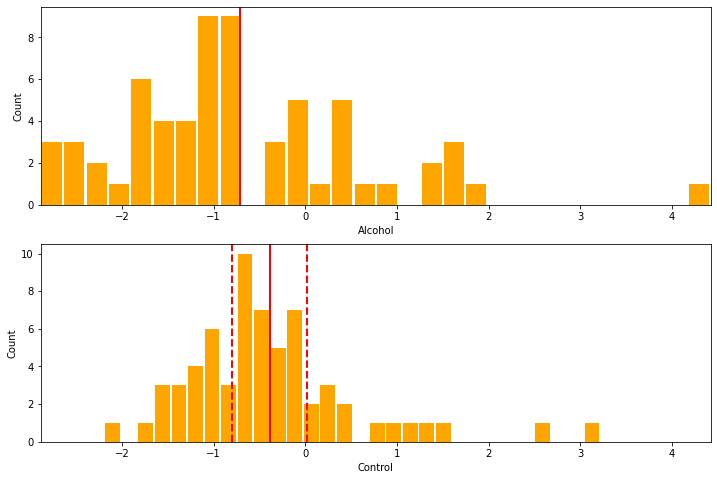

In [19]:
 hist_brain_conf(S1, 'Control','Alcohol')

		RESULT : 


The difference of the means is 0.076 inches. You can see this difference graphically by comparing
the positions of the solid red lines showning the means of the two distirbutions.



The critical value of the two-sided t-statistic is 1.96. The t-statistic of 0.923 is smaller than
this critical value.



The P-value is effectively 0.36, which is larger than the significance level of 0.05.



The 95% confidence interval of the difference in means is from -0.596 to 0.747, which does overlap
0. You can see the confidence interval plotted as the two dashed red lines in the lower chart shown
below. This confidence interval around the mean of the alcohol's sensor value does overlap with the
mean of the control's sensor value .



Overall, these statistics indicate you cannot reject the null hypothesis, or that their difference
in the means is 0, And so the data of above category is similar 





DegFreedom    125.313259
Difference      0.075578
Statistic       0.922832
PValue          0.359616
Low95CI        -0.596239
High95CI        0.747395
dtype: float64

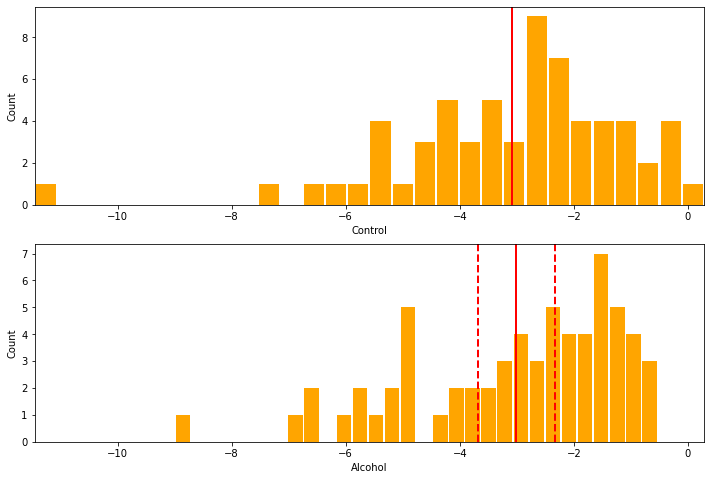

In [20]:
 hist_brain_conf(S2Match, 'Alcohol','Control')

		RESULT : 


The difference of the means is 0.52 inches. You can see this difference graphically by comparing the
positions of the solid red lines showning the means of the two distirbutions.



The critical value of the two-sided t-statistic is 1.96. The t-statistic of 6.092 is greater than
this critical value.



The P-value is effectively 0.0, which is smaller than the significance level of 0.05.



The 95% confidence interval of the difference in means is from -0.116 to 1.156, which does overlap
0. You can see the confidence interval plotted as the two dashed red lines in the lower chart shown
below. This confidence interval around the mean of the alcohol's sensor value does overlap with the
mean of the control's sensor value .



Overall, these statistics indicate you can reject the null hypothesis, or that their difference in
the means is not 0, And so the data of above category is not similar 





DegFreedom    1.259993e+02
Difference    5.199817e-01
Statistic     6.092121e+00
PValue        7.395597e-08
Low95CI      -1.164832e-01
High95CI      1.156447e+00
dtype: float64

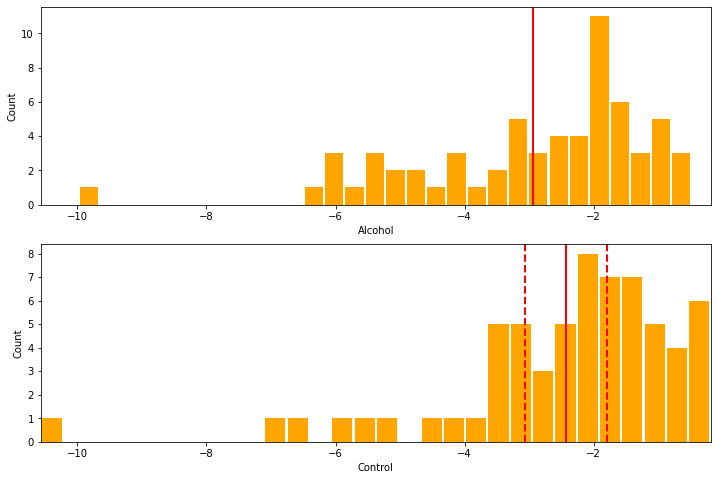

In [21]:
 hist_brain_conf(S2NoMatch, 'Control','Alcohol')

In [22]:
n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'subject identifier']=='a':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop1")

Alc=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)

Xa=Alc[['sensor value']]
xa=[]
for column in Xa.columns:
    xa=Xa[column].tolist()

n=0
for i in range(1,469):
    F=pd.read_csv("C:/EEG_SEM5/SMNI_CMI_TRAIN/Data"+str(i)+".csv")
    #Converting objects to aprropriate DataTypes
    F['matching condition']= F['matching condition'].astype(str)
    F['subject identifier']= F['subject identifier'].astype(str)
    if F.loc[5,'subject identifier']=='c':
        n=n+1
        if n==1:
            Z= F
        else: 
            Z = Z.append(F)
print("End of Loop2")
Cont=Z[['channel','sensor value']].groupby('channel',as_index=False).mean().sort_values(by='channel',ascending=False)

Xc=Cont[['sensor value']]
xc=[]
for column in Xc.columns:
    xc=Xc[column].tolist()

End of Loop1
End of Loop2


In [23]:
B=[]
for i in range(0, 64):
    B.append(str(i))

fig = go.Figure()
fig.add_trace(go.Bar(x=B, y=xa, name="Alcohol Group"))
fig.add_trace(go.Bar(x=B, y=xc, name="Control Group"))

fig.update_layout(barmode='group',
                    title="Group by Alcohol and Control group",
                    xaxis_title="Sensor Channel",
                    yaxis_title="Sensor Value",
                    legend_title="Plotted :",)
fig.show()

		RESULT : 


The difference of the means is 0.258 inches. You can see this difference graphically by comparing
the positions of the solid red lines showning the means of the two distirbutions.



The critical value of the two-sided t-statistic is 1.96. The t-statistic of 3.614 is greater than
this critical value.



The P-value is effectively 0.001, which is smaller than the significance level of 0.05.



The 95% confidence interval of the difference in means is from -0.214 to 0.73, which does overlap 0.
You can see the confidence interval plotted as the two dashed red lines in the lower chart shown
below. This confidence interval around the mean of the alcohol's sensor value does overlap with the
mean of the control's sensor value .



Overall, these statistics indicate you can reject the null hypothesis, or that their difference in
the means is not 0, And so the data of above category is not similar 





DegFreedom    123.786959
Difference      0.257757
Statistic       3.613953
PValue          0.000600
Low95CI        -0.214370
High95CI        0.729884
dtype: float64

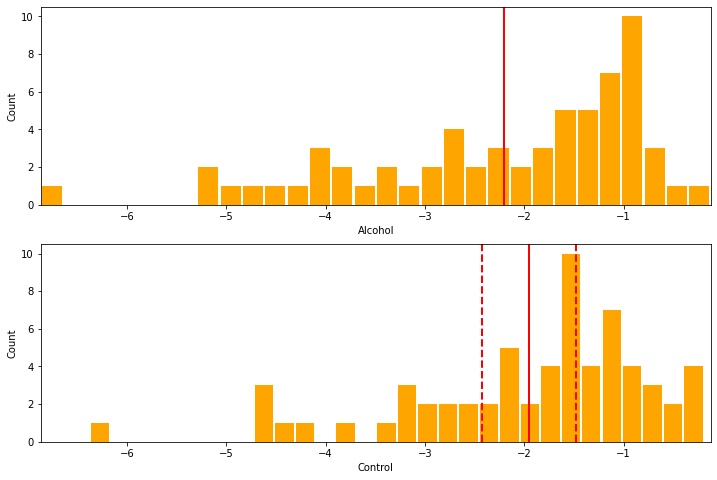

In [24]:
Hypo=pd.DataFrame({'Channel':Alc['channel'], 'Alcohol':Alc['sensor value'],'Control':Cont['sensor value']})
hist_brain_conf(Hypo, 'Control','Alcohol')


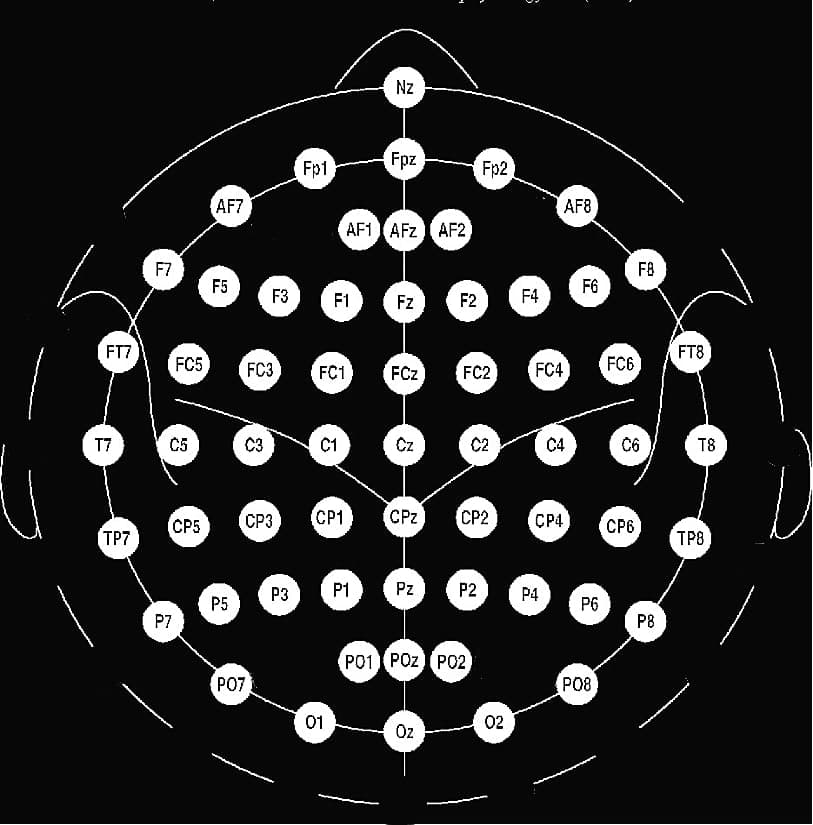

In [25]:
with open("C:\EEG_SEM5\elec-pos.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
encoded_image = "data:image/png;base64," + encoded_string

Y=[194, 193, 310, 310, 264, 264, 347, 340, 340, 419, 419, 429, 429, 512, 512, 512, 512, 512, 605, 606, 595, 595, 684, 684, 677, 715, 715, 761, 761, 831, 831, -30, 237, 237, 330, 330, 405, 405, 183, 425, 426, 512, 512, 346, 346, 619, 619, 265, 599, 599, 695, 695, 512, 512, 787, 787, 430, 760, 842, 679, 679, 594, 100, -60]
X=[362, 568, 188, 742, 414, 519, 465, 609, 321, 713, 217, 549, 381, 812, 118, 465, 292, 638, 217, 713, 382, 549, 321, 609, 465, 742, 188, 519, 414, 568, 362, -30, 266, 664, 252, 678, 136, 794, 465, 631, 299, 725, 205, 537, 393, 794, 136, 465, 299, 631, 252, 678, 379, 552, 266, 664, 465, 465, 465, 538, 393, 465, 465, -60]
col = []
sz = []
for i in range(0, 64):
    col.append(abs(xa[i]-xc[i]))
    sz.append(35)
   
fig = go.Figure(data=[go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    marker=dict(
        color=col,
        size=sz,
        opacity=0.6,
        showscale=True
        )
)])

img_width = 934
img_height = 948
scale_factor = 0.1
fig.add_layout_image(
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1,
        layer="below",
        source=encoded_image
)
fig.update_xaxes(showgrid=False, range=(0, img_width))
fig.update_yaxes(showgrid=False, scaleanchor='x', range=(img_height, 0))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})